# Feature scaling

Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it

## Normalization

Normalization is the process of converting an actual range of values which a numerical feature can take, into a standard range of values, typically in the interval [−1,1] or [0,1]. 

For example, suppose the natural range of a particular feature is 350 to 1450. By subtracting 350 from every value of the feature, and dividing the result by 1100, one can normalize those values into the range [0,1]. 

More generally, the normalization formula looks like this: 

$$\overline{x}^{(j)}=\frac{x^{(j)}-m i n^{(j)}}{\max (j)-\min (j)}$$

Why do we normalize? Normalizing the data is not a strict requirement. However, in practice, it can lead to an increased speed of learning

Imagine you have a two-dimensional feature vector. When you update the parameters of $w (1)$  and $w (2)$ , you use partial derivatives of the mean squared error with respect to $w (1)$ and $w (2)$ . If $x (1)$ is in the range [0,1000] and $x (2)$ the range [0,0.0001], then the derivative with respect to a larger feature will dominate the update

## Standardization

Standardization (or z-score normalization) is the procedure during which the feature values are rescaled so that they have the properties of a standard normal distribution with $\mu = 0$ and $\sigma = 1$, where $\mu$ is the mean (the average value of the feature, averaged over all examples in the dataset) and $\sigma$ is the standard deviation from the mean.

Standard scores (or z-scores) of features are calculated as follows: 

$$\hat{x}^{(j)}=\frac{x^{(j)}-\mu^{(j)}}{\sigma^{(j)}}$$

### a rule of thumb

- unsupervised learning algorithms, in practice, more often benefit from standardization than from normalization;
- standardization is also preferred for a feature if the values this feature takes are distributed close to a normal distribution (so-called bell curve); 
- again, standardization is preferred for a feature if it can sometimes have extremely high or low values (outliers); this is because normalization will “squeeze” the normal values into a very small range; • in all other cases, normalization is preferable. 

In [2]:
import pandas as pd

from sklearn.datasets import load_boston
import numpy as np
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

In [3]:
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt
sns.distplot(df.CRIM)

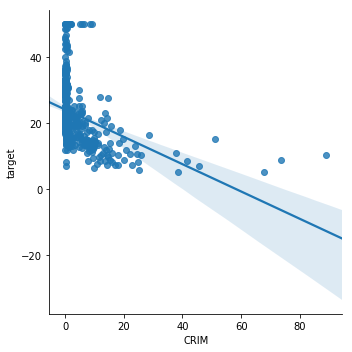

In [4]:
sns.lmplot(x="CRIM", y="target", data=df)

In [9]:
def standardized(X):
    """
        **Standardize Vector**

        This return the standardized values of a given vector

        Args:
            X (float):  Vector to be standardize.

        Returns:
            int.  The return code::
                vector

    """
    ## Data
    df_sdt = df.copy()
    name = X + '_std'
    df_sdt[name] = (df_sdt[X] - np.mean(df_sdt[X])) / np.std(df_sdt[X])

    df_sdt = df_sdt[[name, 'target']]

    sns.lmplot(x=name, y="target", data=df_sdt)
    
    return df_sdt, name

In [11]:
#standardized(X = 'CRIM')[]

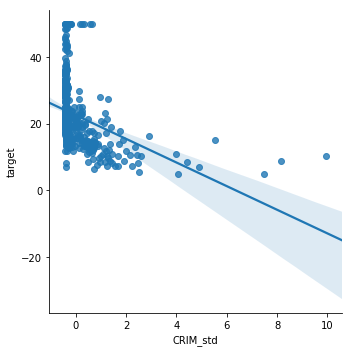

In [8]:
standardized(X = 'CRIM')

In [14]:
def min_max(X):
    """
        **Normalize Vector**

        This return the normalized values of a given vector

        Args:
            X (float):  Vector to be Normalize.

        Returns:
            int.  The return code::
                vector

    """
  
    df_minmax = df.copy()
    name = X + '_minmax'
 
  
    df_minmax[name] = (df_minmax[X] - np.min(df_minmax[X])) / \
  (np.max(df_minmax[X]) - np.min(df_minmax[X]))
  
    df_minmax = df_minmax[[name, 'target']]
  
    sns.lmplot(x = name, y="target", data=df_minmax)

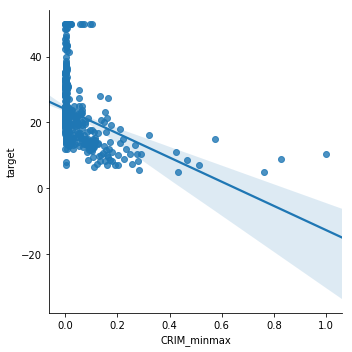

In [15]:
min_max(X = 'CRIM')

In [16]:
def log_scale(X):
    """
        **Log scale Vector**

        This return the log values of a given vector

        Args:
            X (float):  Vector to be in log.

        Returns:
            int.  The return code::
                vector

    """

    df_log = df.copy()
    name = X + '_log'
 
  
    df_log[name] = np.log(df_log[X])
  
    df_log = df_log[[name, 'target']]
  
    sns.lmplot(x = name, y="target", data=df_log)

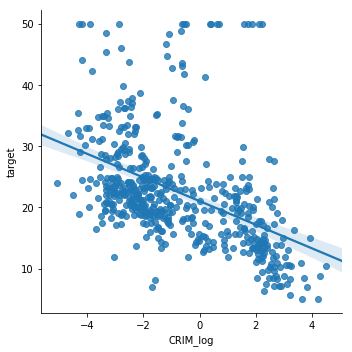

In [17]:
log_scale(X = 'CRIM')

# More Complex

## Multivariate Newton method

To summarize the multivariate Newton-Raphson method: 
Suppose $$f : \mathbb{R}^{k} \rightarrow \mathbb{R}$$ is twice continuously differentiable. 

- Pick an initial value $x_{0}=a$
- Let $ x_{t+1}=x_{t}-H^{-1} \nabla f\left(x_{t}\right)$ where  $H=\nabla^{2} f\left(x_{t}\right)$

- $f$ attains a max at the x-value to which the sequence $\left\{x_{0}, x_{1}, \ldots\right\}$ converges.  

- $\beta^{(t+1)}=\beta^{(t)}-H^{-1} \nabla L\left(\beta^{(t)}\right)$
  - where : $H=\nabla^{2} L\left(\beta^{(t)}\right)$
- $\beta^{(t+1)}=\beta^{(t)}-\left(-Z^{T} W Z\right)^{-1} Z^{T}(\boldsymbol{y}-\boldsymbol{p})$
- $\beta^{(t+1)}=\left(Z^{T} W Z\right)^{-1}\left(Z^{T} W\right) v$
  - where: $\boldsymbol{v}=Z \beta^{(t)}+W^{-1}(\boldsymbol{y}-\boldsymbol{p})$

This method is then called iterative reweighted least squares. At each iteration, $\beta^{(t)}$ gets updated, and so do $\boldsymbol{p}, W$, and $\boldsymbol{v}$.


### Example Maximizing log likelihood function

- Find the log-likelihood function $L(\beta)$.
- Apply iterative reweighted least squares to find estimates for $\beta_{0}, \beta_{1}, \beta_{2}$
- Find the estimated probability function $\hat{p}(x)$, where $p(x)=\operatorname{Pr}(Y=1 | X=x)$
- Classify the new point $x=(5,0)$ using $\hat{p}(x)$

Log likelihood function:

$$L(\beta)=\sum_{i=1}^{N}\left[y_{i} \beta^{T} z_{i}^{\prime}-\log \left(1+e^{\beta^{T} z_{i}^{\prime}}\right)\right]$$

In [ ]:
def log_likelihood(y, beta, Z):
    LL = np.sum(y * np.transpose(beta) * Z - np.log(1 + np.exp(np.transpose(beta) * Z)))
    return LL

In [ ]:
max_iterations = 5


def netwon_raphson(Z, y, beta, max_iteration):
    iteration = 0
    LL_current = log_likelihood(y, beta, Z)
    LL_delta = 1
    list_LL = []
    list_iter = []
    while abs(LL_delta) > 0.001 and iteration < max_iterations:
        p = np.exp(np.sum(np.transpose(beta) * Z, axis=1)) / (
            1 + np.exp(np.sum(np.transpose(beta) * Z, axis=1))
        )
        one_p = 1 / (1 + np.exp(np.sum(np.transpose(beta) * Z, axis=1)))
        W = np.zeros((len(Z), len(Z)))
        i = 0
        np.fill_diagonal(W, p * one_p)
        v = np.sum(Z * beta, axis=1) + np.diagonal(np.linalg.inv(W) * (y - p))
        beta = np.dot(
            np.dot(
                np.linalg.inv(np.dot(np.dot(np.transpose(Z), W), Z)),
                np.matmul(np.transpose(Z), W),
            ),
            v,
        )
        LL_new = log_likelihood(y, beta, Z)
        LL_delta = LL_current - LL_new
        LL_current = LL_new
        iteration += 1
        list_LL.append(LL_delta)
        list_iter.append(iteration)
    dic_nr = {"x": list_iter, "list_LL": list_LL}
    df = pd.DataFrame(dic_nr)
    # print(iteration, beta, LL_delta)
    return beta, df

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
import matplotlib.pyplot as plt


Z = np.array([[1, 1, 3], [1, 2, 4], [1, 4, 1], [1, 3, 1], [1, 4, 2],])

y = np.array([[0], [0], [0], [1], [1]])

groups = ["Yes", "No"]
colors = ["red", "blue"]
beta = np.array([0, 0, 0])
Z.shape, len(Z)

In [ ]:
max_iteration = 5
beta, df = netwon_raphson(Z, y, beta, max_iteration)
sns.scatterplot(x="x", y="list_LL", data=df)